In [0]:
!sudo mv kaggle.json ~/.kaggle

In [11]:
!kaggle datasets download -d stackoverflow/so-survey-2017

 52% 5.00M/9.69M [00:00<00:00, 26.0MB/s]
100% 9.69M/9.69M [00:00<00:00, 38.4MB/s]


In [15]:
!unzip so-survey-2017.zip

Archive:  so-survey-2017.zip
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.

In [0]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# reading dataset
survey = pd.read_csv("survey_results_public.csv")
survey.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,...,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,...,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,I have created a CV or Developer Story on Stac...,8.0,Desktop; iOS browser; iOS app; Android browser...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,...,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some i

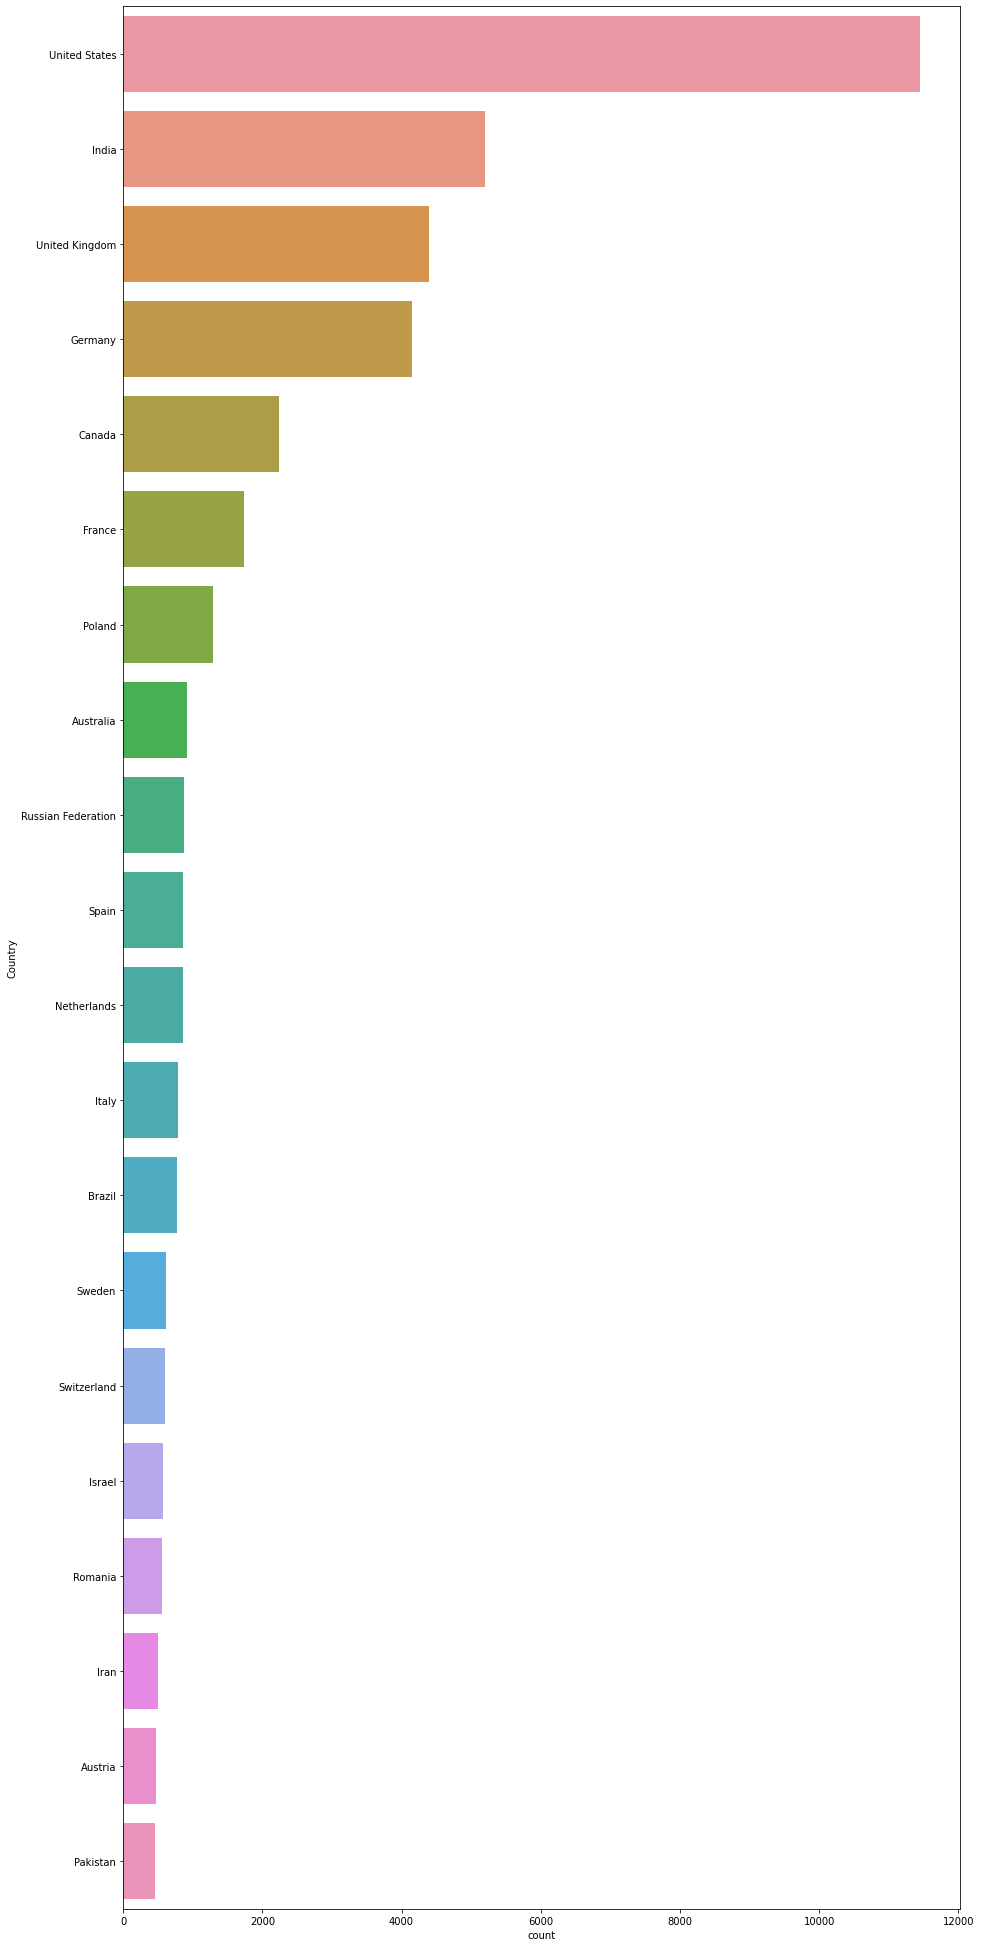

In [19]:
# plotting User count according to country
plt.subplots(figsize=(15,35))
sns.countplot(y = survey.Country, order = survey.Country.value_counts()[0:20].index)

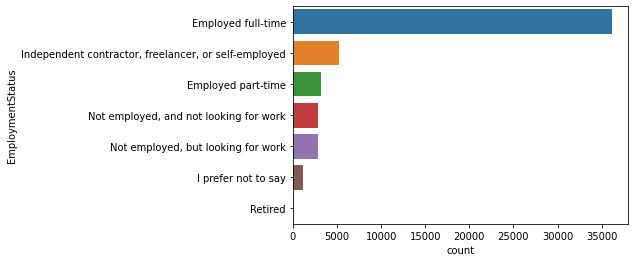

In [0]:
# ploting employment status count of Users 
survey.EmploymentStatus.unique()
sns.countplot(y=survey.EmploymentStatus, order = survey.EmploymentStatus.value_counts().index)

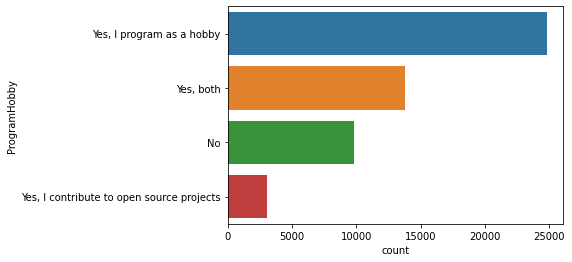

In [0]:
sns.countplot(y = survey.ProgramHobby, order = survey.ProgramHobby.value_counts().index)

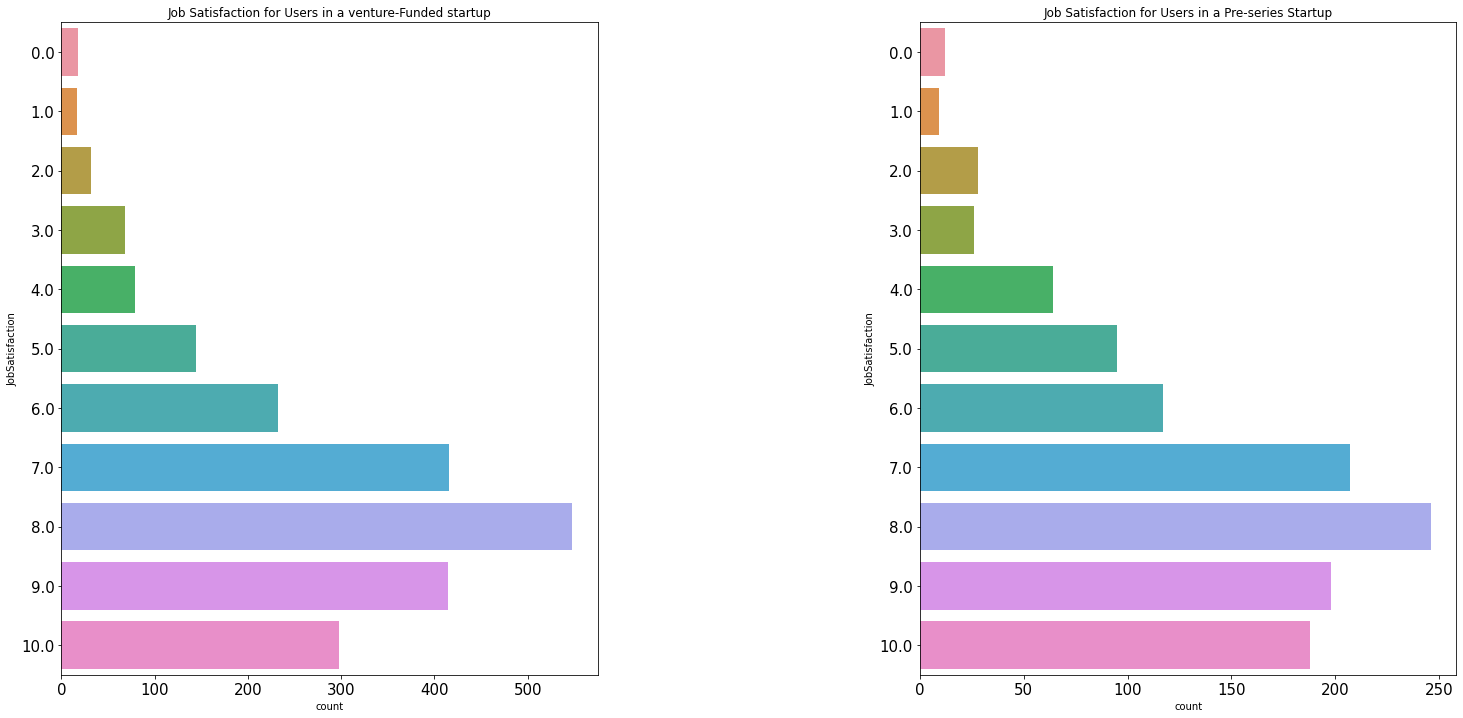

In [0]:
# lets check the satisfaction level of people working in startups
# survey.CompanyType == "Venture-funded startup"
dev_in_startup = survey.loc[(survey.CompanyType == "Venture-funded startup") | (survey.CompanyType == "Pre-series A startup")]
fig,ax=plt.subplots(1,2,figsize=(25,12))

#### first figure
dev_venture_funded = survey.loc[survey.CompanyType == "Venture-funded startup"]
sns.countplot(y = dev_venture_funded.JobSatisfaction, ax=ax[0])
ax[0].set_title('Job Satisfaction for Users in a venture-Funded startup')

#### second figure
dev_pre_startup = survey.loc[survey.CompanyType == "Pre-series A startup"]
sns.countplot(y = dev_pre_startup.JobSatisfaction, ax=ax[1])
ax[1].set_title('Job Satisfaction for Users in a Pre-series Startup')

plt.subplots_adjust(hspace=0.1,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

In [0]:
from collections import Counter
developerType = []
temp = survey.DeveloperType.drop(survey.loc[survey.DeveloperType.isnull()].index)
for i in temp:
    if i is not None:
        types = i.replace(' ', '').split(";")
        developerType.extend(types)
print(Counter(developerType))



Counter({'Webdeveloper': 26235, 'Desktopapplicationsdeveloper': 10435, 'Mobiledeveloper': 8326, 'Databaseadministrator': 5192, 'Developerwithastatisticsormathematicsbackground': 4091, 'Systemsadministrator': 4086, 'DevOpsspecialist': 4015, 'Embeddedapplications/devicesdeveloper': 3352, 'Datascientist': 3045, 'Other': 2694, 'Graphicsprogramming': 1731, 'Graphicdesigner': 1426, 'Machinelearningspecialist': 1379, 'Qualityassuranceengineer': 1252})


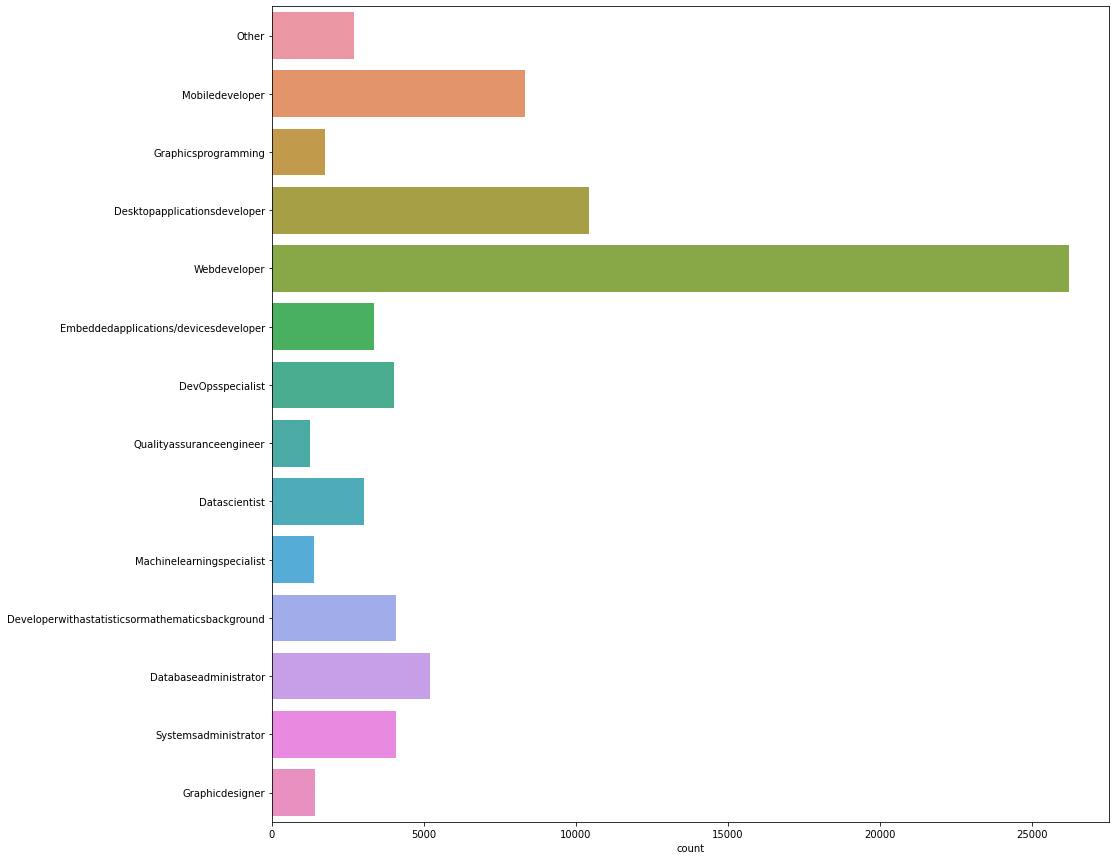

In [0]:
plt.subplots(figsize=(15,15))   
sns.countplot(y = developerType)

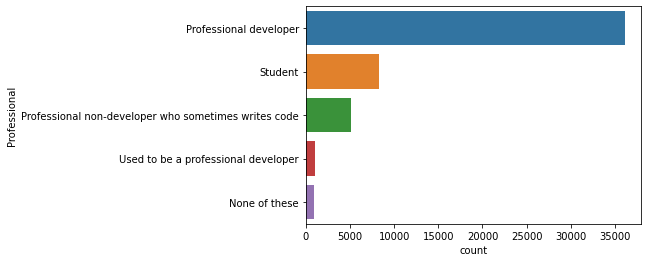

In [0]:
survey.Professional.unique()
sns.countplot(y = survey.Professional, order = survey.Professional.value_counts().index)

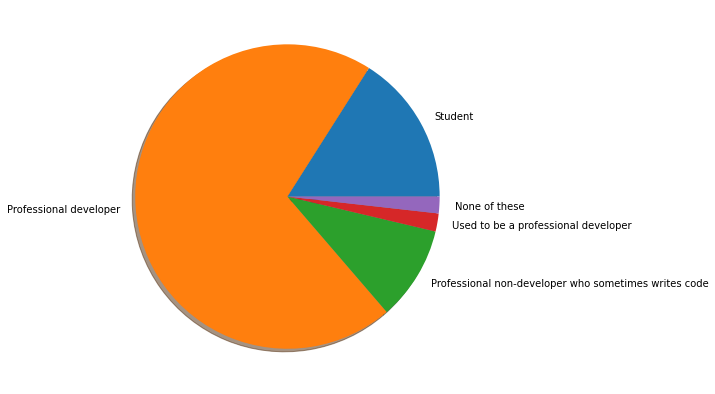

In [0]:
plt.subplots(figsize=(7,7))  
plt.pie(dict(Counter(survey.Professional)).values(),
        labels = dict(Counter(survey.Professional)).keys(),
        shadow = True,
        startangle = 0);

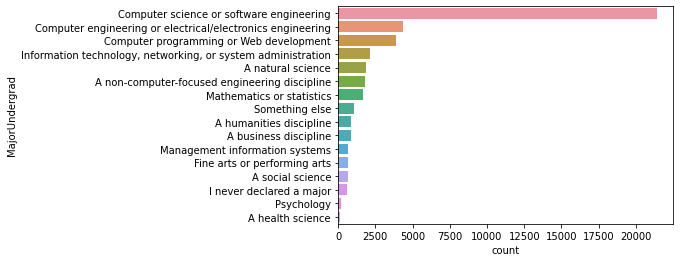

In [0]:
survey.MajorUndergrad.unique()
sns.countplot(y = survey.MajorUndergrad, order = survey.MajorUndergrad.value_counts().index)

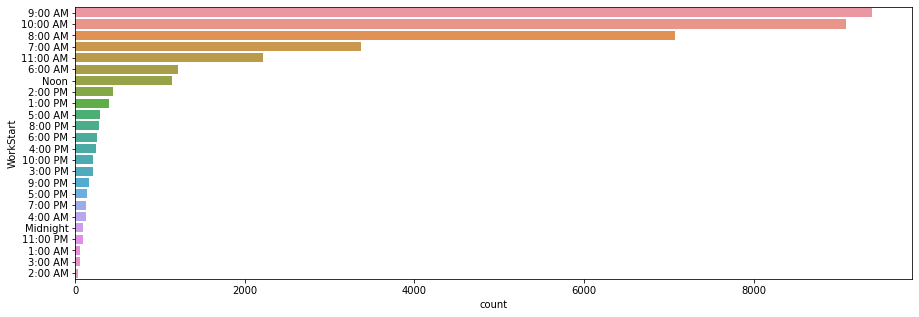

In [0]:
plt.subplots(figsize=(15,5))  
survey.WorkStart.unique()
sns.countplot(y = survey.WorkStart, order = survey.WorkStart.value_counts().index)

In [0]:
temp = survey.HaveWorkedLanguage.drop(survey.loc[survey.HaveWorkedLanguage.isnull()].index)
languages = []
row = {}
for i in temp:
    if i is not None: 
        types = i.split(";")
        languages.extend(types)
popularLanguages = Counter(languages).most_common(20)

languages = [i[0] for i in popularLanguages]
lang_count = [i[1] for i in popularLanguages]

df = pd.DataFrame()
df['Languages'] = languages
df['Number_of_Users'] = lang_count
df.head(20)                   

,Languages,Number_of_Users
0,SQL,18466
1,JavaScript,17159
2,Python,10719
3,PHP,9765
4,Java,8622
5,C#,8596
6,Java,5902
7,JavaScript,5716
8,C,5563
9,C++,4628


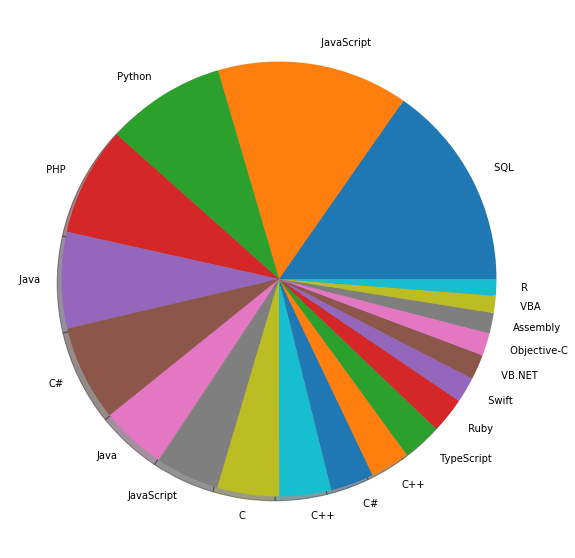

In [0]:
plt.subplots(figsize=(10,10))  
plt.pie(df.Number_of_Users,
        labels = df.Languages,
        shadow = True,
        startangle = 0);

In [0]:
# Most Famous Languages By Country
def get_Most_Used_Language(countryName):
    df = survey.loc[(survey.Country == countryName)]
    # print(df)
    temp = df.HaveWorkedLanguage.drop(df.loc[df.HaveWorkedLanguage.isnull()].index)
    languages = []
    for i in temp:
        if i is not None and type(i) is not float: 
            types = i.split(";")
            languages.extend(types)
    return Counter(languages).most_common(7)

In [0]:
countriesList = [ c[0] for c in Counter(survey.Country).most_common(20)]
country_name = []
lang = [[], [], [], [], [], [], []]
row = {}
Popular_Languages = pd.DataFrame()
for ind, country in enumerate(countriesList):
    pLangs = get_Most_Used_Language(country)
    for i, l in enumerate(lang):
        l.append(pLangs[i][0])

Popular_Languages['Country'] = countriesList
Popular_Languages['1st Language'] = lang[0]
Popular_Languages['2nd Language'] = lang[1]
Popular_Languages['3rd Language'] = lang[2]
Popular_Languages['4th Language'] = lang[3]
Popular_Languages['5th Language'] = lang[4]

Popular_Languages.head(20)
    

,Country,1st Language,2nd Language,3rd Language,4th Language,5th Language
0,United States,SQL,JavaScript,Python,C#,Java
1,India,SQL,JavaScript,PHP,Java,C
2,United Kingdom,SQL,JavaScript,C#,Python,PHP
3,Germany,SQL,JavaScript,PHP,Java,Python
4,Canada,SQL,JavaScript,Python,C#,Java
5,France,SQL,JavaScript,PHP,Python,Java
6,Poland,SQL,JavaScript,Python,PHP,C#
7,Australia,SQL,JavaScript,C#,Python,PHP
8,Russian Federation,SQL,JavaScript,Python,PHP,C#
9,Spain,SQL,JavaScript,PHP,Python,Java


In [0]:
# compare salaries with prof
saltemp = survey.drop(survey.loc[survey.Salary.isnull()].index)
saltemp = saltemp.drop(saltemp.loc[saltemp.DeveloperType.isnull()].index)
developerType = list(set(developerType))

devDict = {}
for index, dev in enumerate(developerType):
    devDict[dev] = index
    
devSalaries = [[] for i in range(14)]
for index in saltemp.index:
    devlist = saltemp.DeveloperType[index].replace(" ", "").split(";")
    for d in devlist:
        devSalaries[devDict[d]].append(saltemp.Salary[index])

Salaries = []
for sal in devSalaries:
    Salaries.append(np.mean(sal))
    
devSalaries = pd.DataFrame()
devSalaries["developerType"] = developerType
devSalaries["AverageSalary"] = Salaries
devSalaries.head(14)

,developerType,AverageSalary
0,Datascientist,61137.334460
1,DevOpsspecialist,66158.200598
2,Desktopapplicationsdeveloper,56352.857031
3,Graphicsprogramming,53212.892563
4,Systemsadministrator,56331.936263
5,Embeddedapplications/devicesdeveloper,58524.353375
6,Machinelearningspecialist,66023.099171
7,Webdeveloper,54968.020118
8,Other,72344.574448
9,Developerwithastatisticsormathematicsbackground,62455.495840


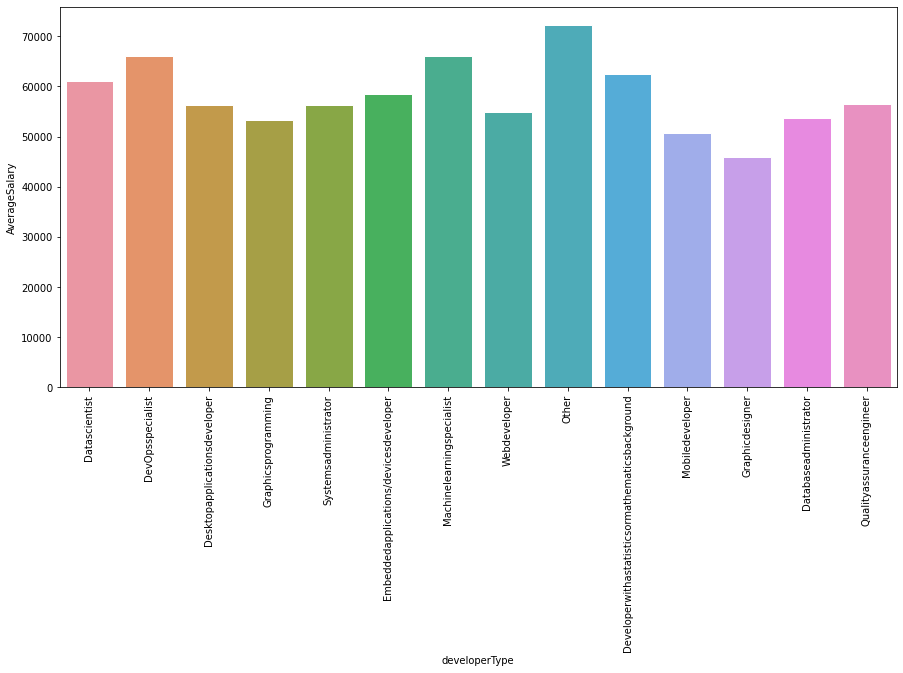

In [0]:
plt.subplots(figsize=(15,7))
sns.set_style("whitegrid")
sal = sns.barplot(x=devSalaries.developerType, y=devSalaries.AverageSalary, orient = 1);
sal.set_xticklabels(devSalaries.developerType, rotation=90);

In [0]:
# remote working vs satisfaction level, company type, JobSatisfaction
temp = survey.drop(survey.loc[survey.HomeRemote.isnull()].index)
temp[['HomeRemote', 'JobSatisfaction']].groupby('HomeRemote').describe()

JobSatisfaction            \
                                                             count      mean   
HomeRemote                                                                     
A few days each month                                      14708.0  7.077509   
About half the time                                         1483.0  6.973702   
All or almost all the time (I'm full-time remote)           4356.0  7.388430   
It's complicated                                            1734.0  6.840830   
Less than half the time, but at least one day e...          3846.0  7.120125   
More than half, but not all, the time                       1602.0  6.953184   
Never                                                      12596.0  6.632502   

                                                                             \
                                                         std  min  25%  50%   
HomeRemote                                                                    
A few days each month                               2.035913  0.0  6.0  7.0   
About half the time                                 2.237874  0.0  6.0  7.0   
All or almost all the time (I'm full-time remote)   2.179372  0.0  6.0  8.0   
It's complicated                                    2.152853  0.0  6.0  7.0   
Less than half the time, but at least one day e...  2.076840  0.0  6.0  7.0   
More than half, but not all, the time               2.210571  0.0  6.0  7.0   
Never                                               2.278049  0.0  5.0  7.0   

                                                               
                                                    75%   max  
HomeRemote                                                     
A few days each month                               8.0  10.0  
About half the time                                 9.0  10.0  
All or almost all the time (I'm full-time remote)   9.0  10.0  
It's complicated                                    8.0  10.0  
Less than half the time, but at least one day e...  9.0  10.0  
More than half, but not all, the time               8.0  10.0  
Never                                               8.0  10.0

In [0]:
temp[['HomeRemote', 'CareerSatisfaction']].groupby('HomeRemote').describe()

CareerSatisfaction  \
                                                                count   
HomeRemote                                                              
A few days each month                                         14734.0   
About half the time                                            1482.0   
All or almost all the time (I'm full-time remote)              4368.0   
It's complicated                                               1738.0   
Less than half the time, but at least one day e...             3853.0   
More than half, but not all, the time                          1602.0   
Never                                                         12625.0   

                                                                             \
                                                        mean       std  min   
HomeRemote                                                                    
A few days each month                               7.477806  1.741805  0.0   
About half the time                                 7.467611  1.954400  0.0   
All or almost all the time (I'm full-time remote)   7.645147  1.915431  0.0   
It's complicated                                    7.289413  1.854436  0.0   
Less than half the time, but at least one day e...  7.595121  1.738513  0.0   
More than half, but not all, the time               7.377029  2.034106  0.0   
Never                                               7.074931  1.984436  0.0   

                                                                         
                                                    25%  50%  75%   max  
HomeRemote                                                               
A few days each month                               7.0  8.0  9.0  10.0  
About half the time                                 6.0  8.0  9.0  10.0  
All or almost all the time (I'm full-time remote)   7.0  8.0  9.0  10.0  
It's complicated                                    6.0  8.0  8.0  10.0  
Less than half the time, but at least one day e...  7.0  8.0  9.0  10.0  
More than half, but not all, the time               6.0  8.0  9.0  10.0  
Never                                               6.0  7.0  8.0  10.0

In [0]:
#salary vs years coded
salYears = survey.drop(survey.loc[survey.Salary.isnull()].index)
salYears = salYears.drop(salYears.loc[salYears.YearsCodedJob.isnull()].index)
salYears = salYears[['Salary', 'YearsCodedJob']].groupby('YearsCodedJob').describe()
salYears = salYears.Salary
salYears.drop(['count', '25%', '50%', '75%'], axis = 1)

,mean,std,min,max
YearsCodedJob,,,,
1 to 2 years,34152.737761,28691.114811,0.000000,150000.0
10 to 11 years,67455.782631,38696.925651,18.045113,195000.0
11 to 12 years,71432.175258,38325.315947,70.000000,185000.0
12 to 13 years,82845.424947,42048.071406,165.000000,195000.0
13 to 14 years,75496.373677,39345.459324,150.000000,180000.0
14 to 15 years,82865.327534,41612.357665,3333.333333,197000.0
15 to 16 years,79883.655653,38473.092155,2389.306600,185000.0
16 to 17 years,77528.611481,44167.615479,7.000000,195000.0
17 to 18 years,87996.924977,40962.457472,0.000000,193750.0


In [0]:
# dev type vs job satisfaction
devSatisfaction = survey.drop(survey.loc[survey.JobSatisfaction.isnull()].index)
devSatisfaction = devSatisfaction.drop(devSatisfaction.loc[devSatisfaction.DeveloperType.isnull()].index)
developerType = list(set(developerType))

devDict = {}
for index, dev in enumerate(developerType):
    devDict[dev] = index
    
devSat = [[] for i in range(14)]
for index in devSatisfaction.index:
    devlist = devSatisfaction.DeveloperType[index].replace(" ", "").split(";")
    for d in devlist:
        devSat[devDict[d]].append(devSatisfaction.JobSatisfaction[index])

jobSatisfaction = []
JobSatSTD = []
JobSatMAX = []
JobSatMIN = []
for sat in devSat:
    jobSatisfaction.append(np.mean(sat))
    JobSatSTD.append(np.std(sat))
    JobSatMIN.append(np.min(sat))
    JobSatMAX.append(np.max(sat))
    
devSatisfaction = pd.DataFrame()
devSatisfaction["Developer_Type"] = developerType
devSatisfaction["Average_JobSatisfaction"] = jobSatisfaction
devSatisfaction["STD_JobSatisfaction"] = JobSatSTD
devSatisfaction["MIN_JobSatisfaction"] = JobSatMIN
devSatisfaction["MAX_JobSatisfaction"] = JobSatMAX
devSatisfaction.head(14)

,Developer_Type,Average_JobSatisfaction,STD_JobSatisfaction,MIN_JobSatisfaction,MAX_JobSatisfaction
0,Datascientist,7.181252,2.237616,0.0,10.0
1,DevOpsspecialist,7.216632,2.069082,0.0,10.0
2,Desktopapplicationsdeveloper,6.968011,2.183553,0.0,10.0
3,Graphicsprogramming,7.182598,2.239571,0.0,10.0
4,Systemsadministrator,7.107325,2.228817,0.0,10.0
5,Embeddedapplications/devicesdeveloper,7.103965,2.133858,0.0,10.0
6,Machinelearningspecialist,7.237170,2.224678,0.0,10.0
7,Webdeveloper,7.000786,2.134805,0.0,10.0
8,Other,7.182625,2.142655,0.0,10.0
9,Developerwithastatisticsormathematicsbackground,7.070064,2.179565,0.0,10.0


Average Expected Salary = 33142.22046770968


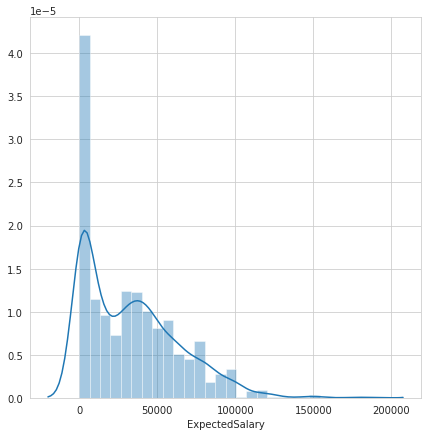

In [0]:
# Expected Salary of Students
students = survey.loc[(survey.Professional == "Student").index]
students = students.ExpectedSalary.drop(students.loc[students.ExpectedSalary.isnull()].index)
plt.subplots(figsize=(7,7))
sns.distplot(students)
AverageSalary = np.mean(students)
print("Average Expected Salary = " + str(AverageSalary))

In [0]:
WebDevs = survey.drop(survey.loc[survey.WebDeveloperType.isnull()].index)

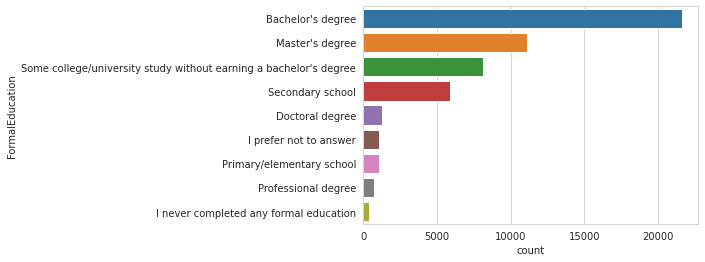

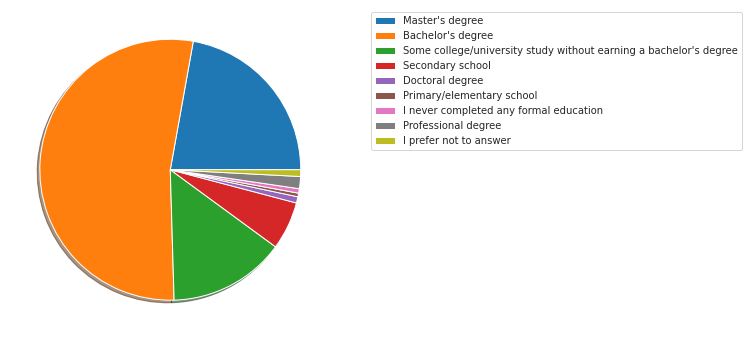

In [0]:
# formal Education of WebDevs
survey.Professional.unique()
sns.countplot(y = survey.FormalEducation, order = survey.FormalEducation.value_counts().index);
plt.subplots(figsize=(6,6))  
plt.pie(dict(Counter(WebDevs.FormalEducation)).values(),
        shadow = True,
        startangle = 0);
plt.legend(list(WebDevs.FormalEducation.unique()),loc = 2, bbox_to_anchor=(1.1, 1))

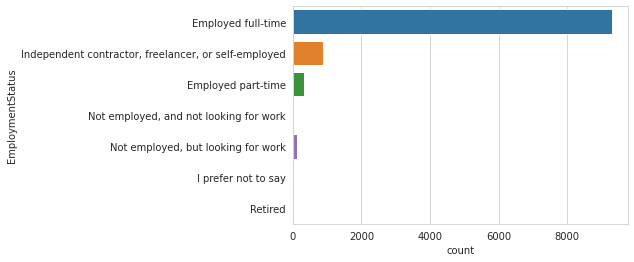

In [0]:
sns.countplot(y = WebDevs.EmploymentStatus, order = survey.EmploymentStatus.value_counts().index)

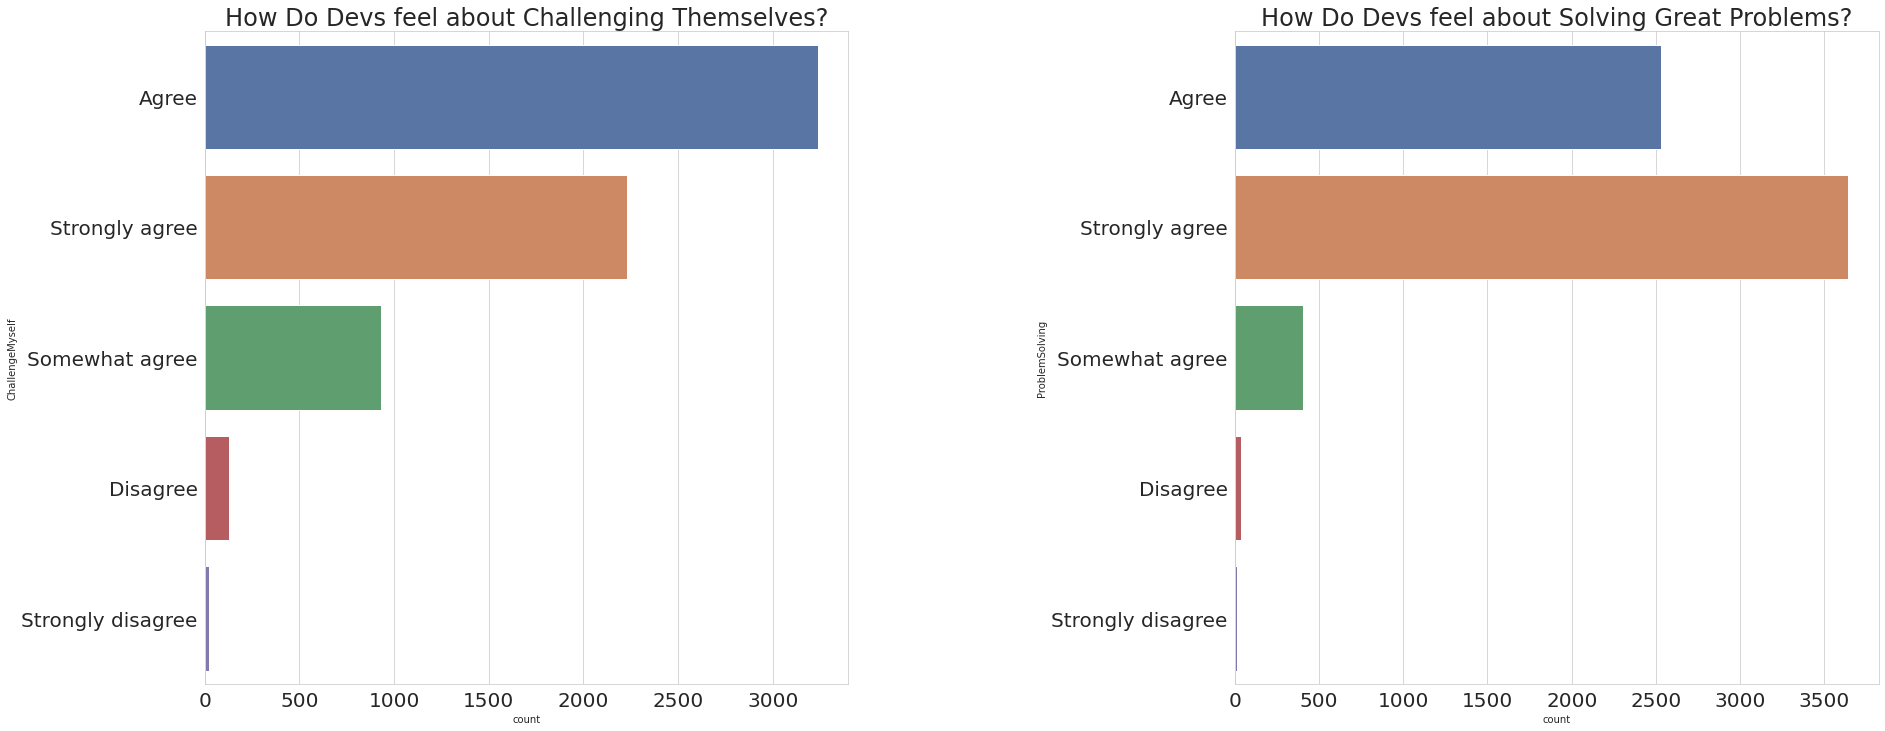

In [0]:
fig,ax=plt.subplots(1,2,figsize=(30,12))
sns.set(font_scale=2)
#### first figure
temp = WebDevs.drop(WebDevs.loc[WebDevs.ChallengeMyself.isnull()].index)
sns.countplot(y = temp.ChallengeMyself, ax=ax[0], label = 'big')
ax[0].set_title('How Do Devs feel about Challenging Themselves?')

#### second figure
temp = WebDevs.drop(WebDevs.loc[WebDevs.ProblemSolving.isnull()].index)
sns.countplot(y = temp.ProblemSolving, ax=ax[1])
ax[1].set_title('How Do Devs feel about Solving Great Problems?')

plt.subplots_adjust(hspace=0.1,wspace=0.6)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
plt.show()


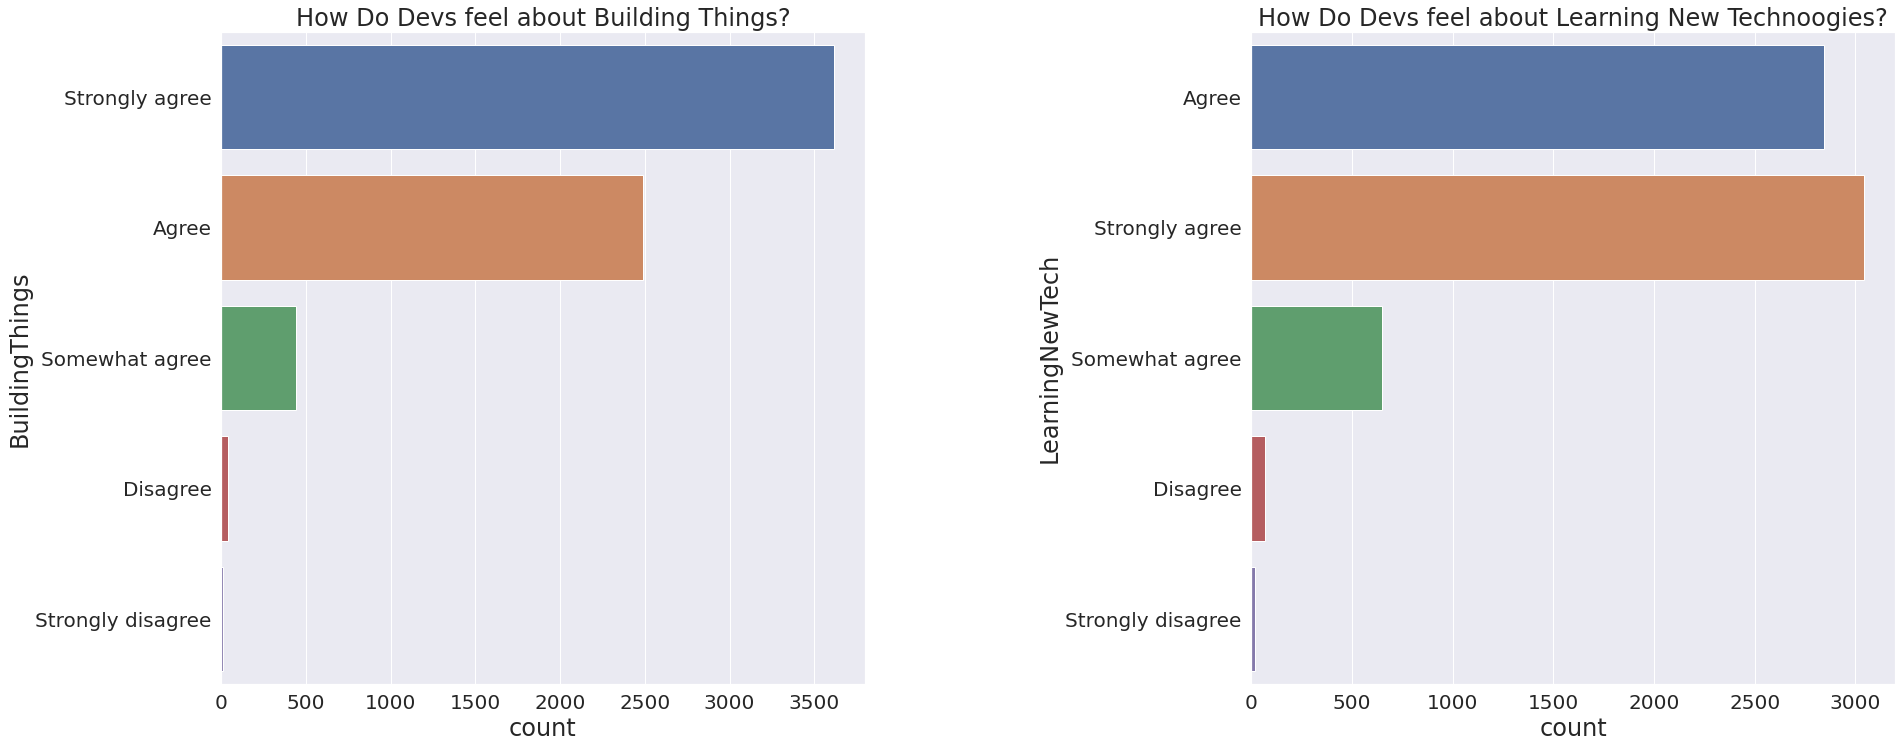

In [0]:
fig,ax=plt.subplots(1,2,figsize=(30,12))
sns.set(font_scale=2)
#### first figure
temp = WebDevs.drop(WebDevs.loc[WebDevs.BuildingThings.isnull()].index)
sns.countplot(y = temp.BuildingThings, ax=ax[0], label = 'big')
ax[0].set_title('How Do Devs feel about Building Things?')

#### second figure
temp = WebDevs.drop(WebDevs.loc[WebDevs.LearningNewTech.isnull()].index)
sns.countplot(y = temp.LearningNewTech, ax=ax[1])
ax[1].set_title('How Do Devs feel about Learning New Technoogies?')

plt.subplots_adjust(hspace=0.1,wspace=0.6)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
plt.show()

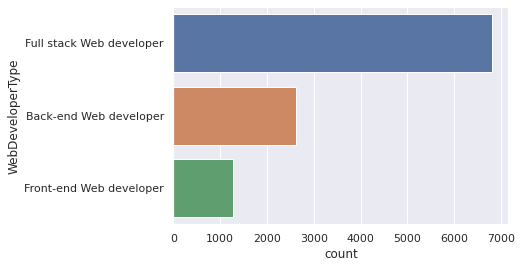

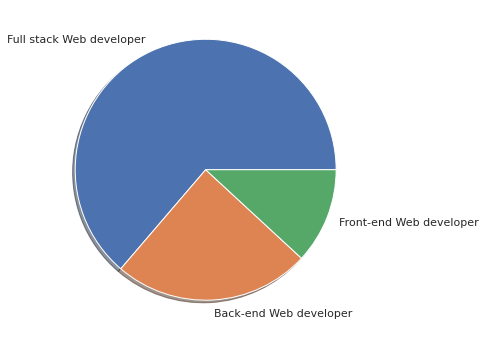

In [0]:
sns.set(font_scale=1)
sns.countplot(y = survey.WebDeveloperType, order = survey.WebDeveloperType.value_counts().index);
plt.subplots(figsize=(6,6))  
plt.pie(dict(Counter(WebDevs.WebDeveloperType)).values(),
        labels = list(WebDevs.WebDeveloperType.unique()),
        shadow = True,
        startangle = 0);

In [0]:
sal = WebDevs.drop(WebDevs.loc[survey.Salary.isnull()].index)
sal = sal[['Salary', 'WebDeveloperType']].groupby('WebDeveloperType').describe()
sal = sal.Salary
sal.drop(['count', 'min', 'std', '25%', '50%', '75%'], axis = 1)

,mean,max
WebDeveloperType,,
Back-end Web developer,51103.242190,185000.0
Front-end Web developer,51236.587277,170000.0
Full stack Web developer,55237.946123,195000.0


In [0]:
# compare salaries with prof
saltemp = survey.drop(survey.loc[survey.Salary.isnull()].index)
saltemp = saltemp.drop(saltemp.loc[saltemp.DeveloperType.isnull()].index)
developerType = list(set(developerType))

devDict = {}
for index, dev in enumerate(developerType):
    devDict[dev] = index
    
devSalaries = [[] for i in range(14)]
for index in saltemp.index:
    devlist = saltemp.DeveloperType[index].replace(" ", "").split(";")
    for d in devlist:
        devSalaries[devDict[d]].append(saltemp.Salary[index])

Salaries = []
for sal in devSalaries:
    Salaries.append(np.mean(sal))
    
devSalaries = pd.DataFrame()
devSalaries["developerType"] = developerType
devSalaries["AverageSalary"] = Salaries
devSalaries.head(14)

,developerType,AverageSalary
0,Datascientist,61137.334460
1,DevOpsspecialist,66158.200598
2,Desktopapplicationsdeveloper,56352.857031
3,Graphicsprogramming,53212.892563
4,Systemsadministrator,56331.936263
5,Embeddedapplications/devicesdeveloper,58524.353375
6,Machinelearningspecialist,66023.099171
7,Webdeveloper,54968.020118
8,Other,72344.574448
9,Developerwithastatisticsormathematicsbackground,62455.495840


## modelling

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']

    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    X = df
    return X, y

def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        model = LinearRegression(normalize=True)
        model.fit(X_train, y_train)
        y_test_preds = model.predict(X_test)
        y_train_preds = model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    model = LinearRegression(normalize=True)
    model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, model, X_train, X_test, y_train, y_test

def main():
    df = pd.read_csv('survey_results_public.csv')
    X, y = clean_data(df)
    #cutoffs here pertains to the number of missing values allowed in the used columns.
    #Therefore, lower values for the cutoff provides more predictors in the model.
    cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]

    r2_scores_test, r2_scores_train, model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs, plot=False)
    print('Finished Finding the Best Model of Linear Model')
    return model


if __name__ == '__main__':
    best_model = main()

Finished Finding the Best Model of Linear Model
